## Lead Scoring Case Study (Model building using 'Multivariate Logistic Regression') 

### Problem Statement

#### An education company named X Education sells online courses to industry professionals. When the people fill up a form providing their email address or phone number, they are classified to be a lead. Although X Education gets a lot of leads, its lead conversion rate is very poor. So, help the education company in identifying the most promising leads, i.e. the leads that are most likely to convert into paying customers by building a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.


### Step 1: Reading Data

In [34]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np
pd.set_option('display.max_columns', 500)

In [35]:
# Reading dataset
data = pd.read_csv("C:\\Users\\chaitu07311\\Downloads\\Lead Scoring Case Study\\Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [36]:
# Let's check the dimensions of the dataframe
data.shape

(9240, 37)

In [37]:
# Let's look at the statistical aspects of the dataframe
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [38]:
# Let's see the type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## Handling 'Select' values in dataset

In [39]:
# Find the columns with 'Select' values
data.columns[data.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [40]:
# Replace all 'Select' values with blank
data = data.replace(to_replace = "Select", value = np.nan) 
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Check missing value percentage in each columm

In [41]:
(data.isna().sum()/len(data))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [42]:
# Drop the columns where missing data percentage is more than 40%
data = data.dropna(thresh=data.shape[0]*(1-0.4),how='all',axis=1)
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Imputing missing values in repective columns

In [43]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

data = DataFrameImputer().fit_transform(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9240 non-null float64
Last Activity                                    9240 non-null object
Country                                          9240 non-null object
Specialization                                   9240 

#### Now, all columns have same number of rows and no null values.

In [44]:
# See sample of the data now
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [45]:
data.shape

(9240, 30)

### Step 3: Data Cleaning
#### Dropping columns with same values as they won't add any value to the model.

In [46]:
nunique = data.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
cols_to_drop

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

In [47]:
data = data.drop(cols_to_drop, axis=1)
data.shape

(9240, 25)

#### Converting some binary variables (Yes/No) to 0/1

In [48]:
# List of Yes/No variables to map
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [49]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummyvarlist = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 
'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 
'Tags', 'City', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([data, dummyvarlist], axis=1)

data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email L

#### Dropping the repeated variables

In [50]:
# We have created dummies for the below variables, so we can drop them along with "Prospect ID" column which is of no use of having in model
data = data.drop(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 
'What is your current occupation', 'What matters most to you in choosing a course', 
'Tags', 'City', 'Last Notable Activity'], 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 160 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(12), uint8(146)
memory usage: 2.3 MB


#### Now you can see that we have all variables as numeric.

#### Checking for Outliers

In [51]:
# Checking for outliers in the continuous variables
num_data = data[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_data.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


#### From the distribution shown above, you can see that there are outliers in "TotalVisits" and "Page Views Per Visit" columns. So, let's remove them.

In [52]:
# Remove outliers in specified continuous colums
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

data = remove_outlier(data, 'TotalVisits')
data = remove_outlier(data, 'Page Views Per Visit')

data.shape

(8381, 160)

In [53]:
# Checking again for outliers in the continuous variables after removing them
num_data = data[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_data.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8381.000000,8381.000000,8381.000000,8381.000000
mean,0.383367,2.667104,469.863143,1.961984
std,0.486236,2.282218,544.360489,1.523237
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,231.000000,2.000000
75%,1.000000,4.000000,898.000000,3.000000
90%,1.000000,5.000000,1368.000000,4.000000
95%,1.000000,7.000000,1552.000000,5.000000
99%,1.000000,10.000000,1826.600000,5.000000


#### Now, there are no outliers in data

### Step 4: Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

data.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notabl

In [55]:
### Checking the Converted Rate
convereted = (sum(data['Converted'])/len(data['Converted'].index))*100
convereted

38.33671399594321

#### We have almost 38% converted rate

### Step 5: Looking at Correlations

In [56]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

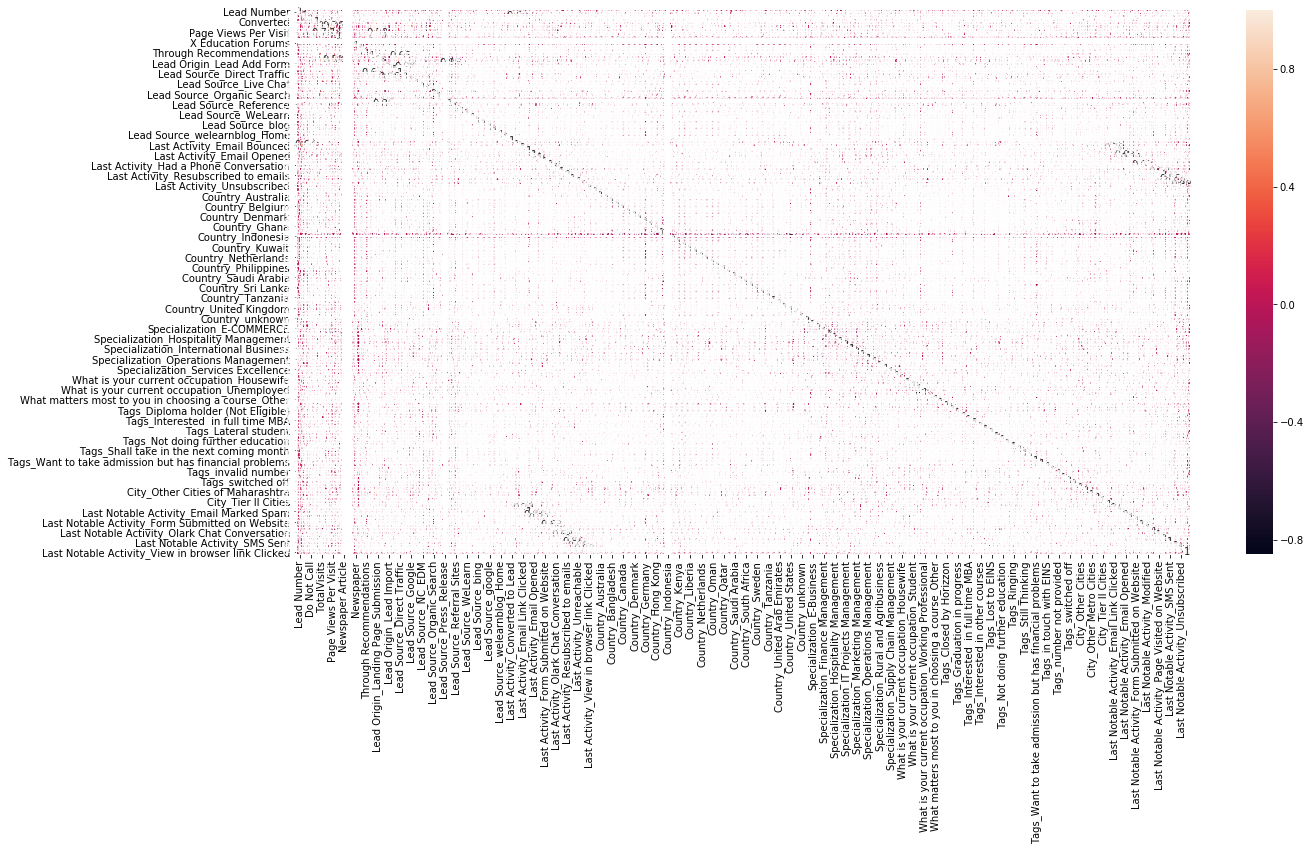

In [57]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [58]:
def drop_corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.6)
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if abs(val) >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        x = x.drop(col, axis=1)
    return x

data = drop_corr_df(data, 0.6)

Page Views Per Visit | TotalVisits | 0.76
Lead Source_Direct Traffic | A free copy of Mastering The Interview | 0.65
Lead Source_Facebook | Lead Origin_Lead Import | 0.98
Lead Source_Olark Chat | Page Views Per Visit | -0.62
Lead Source_Reference | Lead Origin_Lead Add Form | 0.85
Last Activity_Email Bounced | Do Not Email | 0.64
Specialization_Finance Management | Lead Origin_Landing Page Submission | -0.6
Last Notable Activity_Email Link Clicked | Last Activity_Email Link Clicked | 0.79
Last Notable Activity_Email Marked Spam | Last Activity_Email Marked Spam | 1.0
Last Notable Activity_Email Opened | Last Activity_Email Opened | 0.84
Last Notable Activity_Email Received | Last Activity_Email Received | 0.71
Last Notable Activity_Had a Phone Conversation | Last Activity_Had a Phone Conversation | 0.63
Last Notable Activity_Page Visited on Website | Last Activity_Page Visited on Website | 0.68
Last Notable Activity_Resubscribed to emails | Last Activity_Resubscribed to emails | 1.0
La

#### After dropping highly correlated variables now let's check the correlation matrix again.

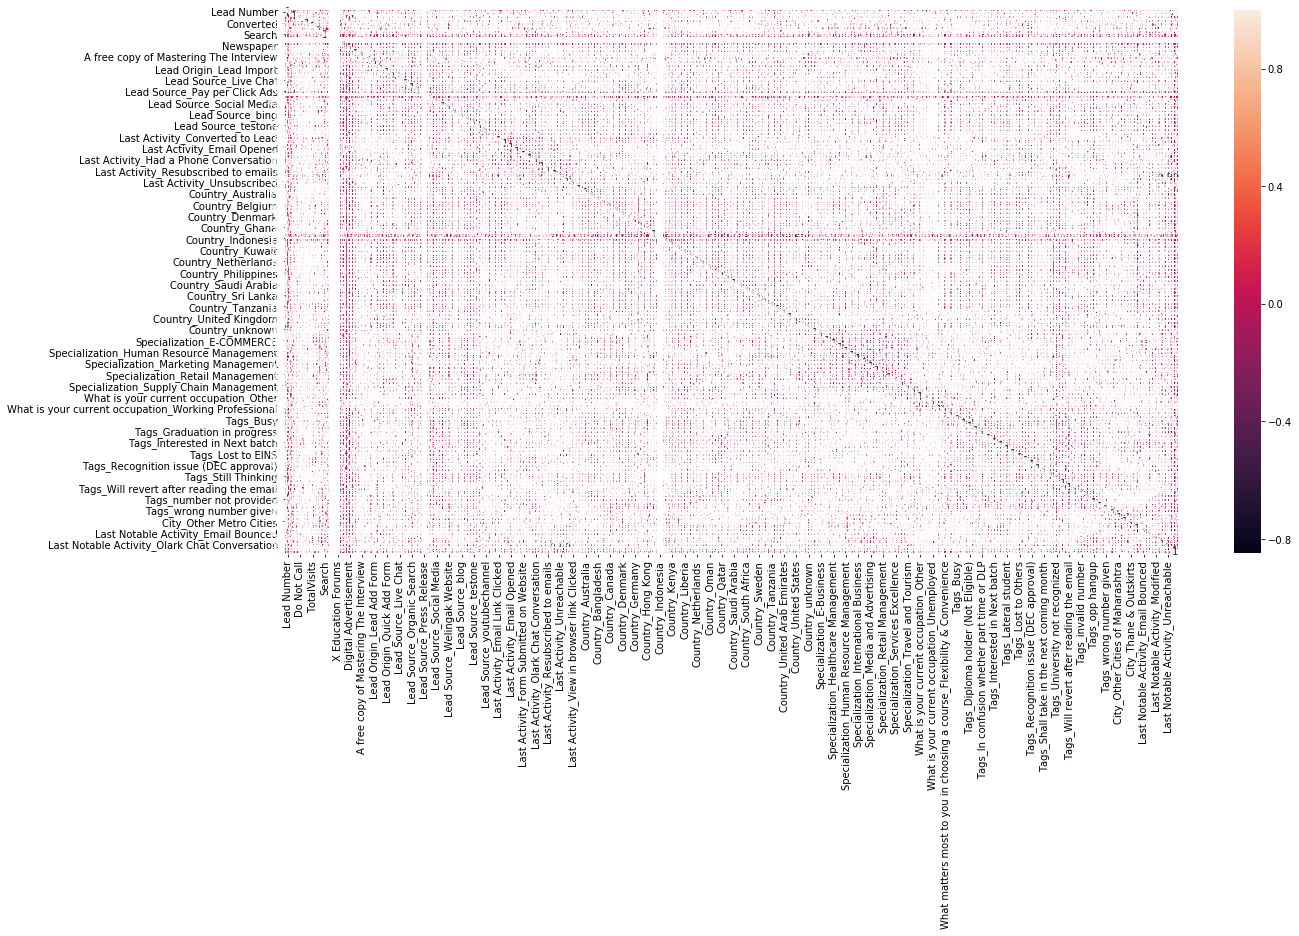

In [59]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot = True)
plt.show()

### Step 6: Test-Train Split

In [60]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = data[data.columns[~data.columns.isin(['Converted','Lead Number'])]]
#X = data.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
0,0,0,-1.168715,-0.863199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [61]:
# Putting response variable to y
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 7: Model Building
#### Running our First Training Model
### Model 1

In [63]:
import statsmodels.api as sm

In [64]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5736
Model Family:                Binomial   Df Model:                          129
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 27 Feb 2020   Deviance:                          nan
Time:                        13:56:06   Pearson chi2:                 4.35e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    5.478e+15   7.82e+07      7e+07      0.000    5.48e+15    5.48e+15
Do Not Email                                                            -6.666e+14    4.7e+06  -1.42e+08      0.000   -6.67e+14   -6.67e+14
Do Not Call                                                              2.434e+15   6.73e+07   3.61e+07      0.000    2.43e+15    2.43e+15
TotalVisits                                                              -2.07e+12   1.27e+06  -1.63e+06      0.000   -2.07e+12   -2.07e+12
Total Time Spent on Website                                              3.427e+14   1.02e+06   3.35e+08      0.000    3.43e+14    3.43e+14
Search                                                                    4.44e+14   3.52e+07   1.26e+07      0.000    4.44e+14    4.44e+14
Newspaper Article                                                        -634.3736   2.55e-06  -2.49e+08      0.000    -634.374    -634.374
X Education Forums                                                        194.4065   6.57e-07   2.96e+08      0.000     194.406     194.406
Newspaper                                                               -8.968e+15   6.74e+07  -1.33e+08      0.000   -8.97e+15   -8.97e+15
Digital Advertisement                                                   -1.427e+15   4.83e+07  -2.96e+07      0.000   -1.43e+15   -1.43e+15
Through Recommendations                                                  6.142e+13   4.08e+07   1.51e+06      0.000    6.14e+13    6.14e+13
A free copy of Mastering The Interview                                  -2.965e+14   2.85e+06  -1.04e+08      0.000   -2.96e+14   -2.96e+14
Lead Origin_Landing Page Submission                                     -3.397e+14   2.88e+06  -1.18e+08      0.000    -3.4e+14    -3.4e+14
Lead Origin_Lead Add Form                                                3.594e+14   4.31e+06   8.33e+07      0.000    3.59e+14    3.59e+14
Lead Origin_Lead Import                                                 -5.626e+14   1.12e+07  -5.02e+07      0.000   -5.63e+14   -5.63e+14
Lead Origin_Quick Add Form                                               3.611e+15   6.81e+07    5.3e+07      0.000    3.61e+15    3.61e+15
Lead Source_Google                                                      -2.481e+14   2.57e+06  -9.66e+07      0.000   -2.48e+14   -2.48e+14
Lead Source_Live Chat                                                    3.139e+15   4.76e+07   6.59e+07      0.000    3.14e+15    3.14e+15
Lead Source_NC_EDM                                                       -583.8302   2.24e-06   -2.6e+08      0.000    -583.830    -583.830
Lea

### Step 8: Feature Selection Using RFE

In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [66]:
#from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [67]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False,

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 64),
 ('TotalVisits', False, 105),
 ('Total Time Spent on Website', False, 5),
 ('Search', False, 45),
 ('Newspaper Article', False, 118),
 ('X Education Forums', False, 116),
 ('Newspaper', False, 93),
 ('Digital Advertisement', False, 73),
 ('Through Recommendations', False, 96),
 ('A free copy of Mastering The Interview', False, 56),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 60),
 ('Lead Origin_Quick Add Form', False, 57),
 ('Lead Source_Google', False, 61),
 ('Lead Source_Live Chat', False, 92),
 ('Lead Source_NC_EDM', False, 122),
 ('Lead Source_Organic Search', False, 70),
 ('Lead Source_Pay per Click Ads', False, 110),
 ('Lead Source_Press_Release', False, 123),
 ('Lead Source_Referral Sites', False, 62),
 ('Lead Source_Social Media', False, 22),
 ('Lead Source_WeLearn', False, 83),
 ('Lead Source_Welingak Website', False, 4),
 ('Lead Source

In [69]:
col = X_train.columns[rfe.support_]

In [70]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       ...
       'Tags_wrong number given', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=127)

## Assessing the model with StatsModels

### Model 2

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5850
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1846.3
Date:                Thu, 27 Feb 2020   Deviance:                       3692.6
Time:                        13:57:34   Pearson chi2:                 8.77e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5338      0.242     -6.332      0.000      -2.009      -1.059
Do Not Email                                     -1.2038      0.189     -6.381      0.000      -1.574      -0.834
Lead Origin_Lead Add Form                         2.6535      0.233     11.410      0.000       2.198       3.109
Last Activity_SMS Sent                            1.8446      0.093     19.931      0.000       1.663       2.026
What is your current occupation_Unemployed       -2.5115      0.188    -13.374      0.000      -2.880      -2.143
Tags_Busy                                         3.2776      0.321     10.224      0.000       2.649       3.906
Tags_Closed by Horizzon                           8.9967      0.758     11.872      0.000       7.511      10.482
Tags_Interested in Next batch                    23.9314   1.51e+04      0.002      0.999   -2.96e+04    2.97e+04
Tags_Lateral student                             25.4193   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Tags_Lost to EINS                                 9.0635      0.761     11.908      0.000       7.572      10.555
Tags_Ringing                                     -0.8959      0.358     -2.503      0.012      -1.597      -0.194
Tags_Will revert after reading the email          3.8110      0.234     16.262      0.000       3.352       4.270
Tags_in touch with EINS                           3.3100      0.872      3.795      0.000       1.600       5.020
Tags_switched off                                -1.9905      1.033     -1.926      0.054      -4.016       0.035
Last Notable Activity_Modified                   -1.6526      0.094    -17.659      0.000      -1.836      -1.469
Last Notable Activity_Olark Chat Conversation    -1.8407      0.350     -5.263      0.000      -2.526      -1.155
=================================================================================================================
"""

#### There are few features which have high p-values considering less than 0.05 is good value. So, let's remove the highest one "Tags_Interested in Next batch" and then assess the model again. Repeat the process until model have all appropriate p-values.

### Model 3

In [72]:
#Removing a feature
col = col.drop('Tags_Interested in Next batch', 1)

# Assess the model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5851
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1852.4
Date:                Thu, 27 Feb 2020   Deviance:                       3704.7
Time:                        13:59:47   Pearson chi2:                 8.69e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4544      0.234     -6.208      0.000      -1.914      -0.995
Do Not Email                                     -1.1747      0.188     -6.264      0.000      -1.542      -0.807
Lead Origin_Lead Add Form                         2.6654      0.232     11.506      0.000       2.211       3.119
Last Activity_SMS Sent                            1.8563      0.092     20.072      0.000       1.675       2.038
What is your current occupation_Unemployed       -2.4801      0.185    -13.397      0.000      -2.843      -2.117
Tags_Busy                                         3.1588      0.313     10.104      0.000       2.546       3.771
Tags_Closed by Horizzon                           8.8902      0.755     11.783      0.000       7.411      10.369
Tags_Lateral student                             24.3024   1.25e+04      0.002      0.998   -2.45e+04    2.46e+04
Tags_Lost to EINS                                 8.9547      0.758     11.818      0.000       7.470      10.440
Tags_Ringing                                     -1.0182      0.351     -2.903      0.004      -1.706      -0.331
Tags_Will revert after reading the email          3.6981      0.223     16.552      0.000       3.260       4.136
Tags_in touch with EINS                           3.1994      0.870      3.679      0.000       1.495       4.904
Tags_switched off                                -2.1089      1.031     -2.046      0.041      -4.129      -0.089
Last Notable Activity_Modified                   -1.6581      0.094    -17.734      0.000      -1.841      -1.475
Last Notable Activity_Olark Chat Conversation    -1.8396      0.349     -5.266      0.000      -2.524      -1.155
=================================================================================================================
"""

### Model 4

In [73]:
#Removing a feature
col = col.drop('Tags_Lateral student', 1)

# Assess the model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5852
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1859.8
Date:                Thu, 27 Feb 2020   Deviance:                       3719.5
Time:                        14:00:32   Pearson chi2:                 8.63e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3954      0.229     -6.099      0.000      -1.844      -0.947
Do Not Email                                     -1.1796      0.187     -6.299      0.000      -1.547      -0.813
Lead Origin_Lead Add Form                         2.6585      0.231     11.500      0.000       2.205       3.112
Last Activity_SMS Sent                            1.8663      0.092     20.201      0.000       1.685       2.047
What is your current occupation_Unemployed       -2.4519      0.183    -13.400      0.000      -2.811      -2.093
Tags_Busy                                         3.0632      0.307      9.962      0.000       2.461       3.666
Tags_Closed by Horizzon                           8.7922      0.752     11.688      0.000       7.318      10.267
Tags_Lost to EINS                                 8.8558      0.755     11.722      0.000       7.375      10.337
Tags_Ringing                                     -1.1114      0.346     -3.210      0.001      -1.790      -0.433
Tags_Will revert after reading the email          3.6059      0.216     16.679      0.000       3.182       4.030
Tags_in touch with EINS                           3.1055      0.868      3.579      0.000       1.405       4.806
Tags_switched off                                -2.2016      1.029     -2.139      0.032      -4.219      -0.184
Last Notable Activity_Modified                   -1.6448      0.093    -17.647      0.000      -1.827      -1.462
Last Notable Activity_Olark Chat Conversation    -1.8350      0.349     -5.258      0.000      -2.519      -1.151
=================================================================================================================
"""

### Model 5

In [74]:
#Removing a feature
col = col.drop('Tags_switched off', 1)

# Assess the model
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5853
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1864.3
Date:                Thu, 27 Feb 2020   Deviance:                       3728.5
Time:                        14:01:20   Pearson chi2:                 8.61e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5957      0.229     -6.962      0.000      -2.045      -1.146
Do Not Email                                     -1.1830      0.187     -6.324      0.000      -1.550      -0.816
Lead Origin_Lead Add Form                         2.6717      0.232     11.512      0.000       2.217       3.127
Last Activity_SMS Sent                            1.8468      0.092     20.112      0.000       1.667       2.027
What is your current occupation_Unemployed       -2.5124      0.186    -13.542      0.000      -2.876      -2.149
Tags_Busy                                         3.3352      0.300     11.110      0.000       2.747       3.924
Tags_Closed by Horizzon                           9.0433      0.751     12.046      0.000       7.572      10.515
Tags_Lost to EINS                                 9.1092      0.754     12.084      0.000       7.632      10.587
Tags_Ringing                                     -0.8399      0.340     -2.472      0.013      -1.506      -0.174
Tags_Will revert after reading the email          3.8666      0.208     18.553      0.000       3.458       4.275
Tags_in touch with EINS                           3.3661      0.865      3.890      0.000       1.670       5.062
Last Notable Activity_Modified                   -1.6358      0.093    -17.525      0.000      -1.819      -1.453
Last Notable Activity_Olark Chat Conversation    -1.8324      0.350     -5.239      0.000      -2.518      -1.147
=================================================================================================================
"""

#### Model 6

In [75]:
#Removing a feature
col = col.drop('Tags_Ringing', 1)

# Assess the model
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5854
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1867.5
Date:                Thu, 27 Feb 2020   Deviance:                       3734.9
Time:                        14:02:26   Pearson chi2:                 8.55e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8641      0.219     -8.492      0.000      -2.294      -1.434
Do Not Email                                     -1.1776      0.187     -6.302      0.000      -1.544      -0.811
Lead Origin_Lead Add Form                         2.6176      0.227     11.543      0.000       2.173       3.062
Last Activity_SMS Sent                            1.8242      0.091     20.011      0.000       1.646       2.003
What is your current occupation_Unemployed       -2.6019      0.189    -13.790      0.000      -2.972      -2.232
Tags_Busy                                         3.7056      0.273     13.583      0.000       3.171       4.240
Tags_Closed by Horizzon                           9.3958      0.742     12.666      0.000       7.942      10.850
Tags_Lost to EINS                                 9.4585      0.745     12.691      0.000       7.998      10.919
Tags_Will revert after reading the email          4.2254      0.171     24.672      0.000       3.890       4.561
Tags_in touch with EINS                           3.7239      0.857      4.346      0.000       2.045       5.403
Last Notable Activity_Modified                   -1.6262      0.093    -17.411      0.000      -1.809      -1.443
Last Notable Activity_Olark Chat Conversation    -1.8321      0.351     -5.221      0.000      -2.520      -1.144
=================================================================================================================
"""

In [76]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2930    0.318566
378     0.440161
2655    0.998891
3752    0.011363
6388    0.440161
9197    0.964555
7687    0.000696
5403    0.829724
1721    0.440161
5935    0.011363
dtype: float64

In [77]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([3.18565645e-01, 4.40160610e-01, 9.98891030e-01, 1.13632329e-02,
       4.40160610e-01, 9.64554530e-01, 6.95775687e-04, 8.29724215e-01,
       4.40160610e-01, 1.13632329e-02])

#### Creating a dataframe with the actual 'Converted' flag and the predicted probabilities

In [78]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number
0,1,0.318566,2930
1,0,0.440161,378
2,1,0.998891,2655
3,0,0.011363,3752
4,0,0.440161,6388


#### Checking VIFs

In [81]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,3.16
7,Tags_Will revert after reading the email,2.42
9,Last Notable Activity_Modified,1.71
2,Last Activity_SMS Sent,1.53
1,Lead Origin_Lead Add Form,1.30
5,Tags_Closed by Horizzon,1.27
0,Do Not Email,1.10
4,Tags_Busy,1.07
6,Tags_Lost to EINS,1.05
10,Last Notable Activity_Olark Chat Conversation,1.05


#### There are no variables with high VIF at all where VIF is considered less than 5 as good value. All variables have a good value of VIF. So we need not to drop any more variables and we can proceed with making predictions using this model only

### Step 9: Plotting the ROC Curve

An ROC curve demonstrates following:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [85]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [86]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

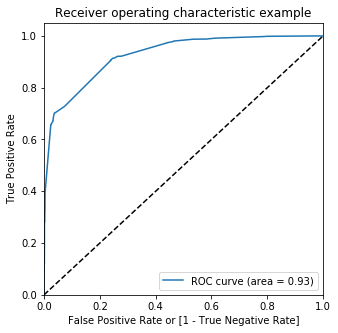

In [87]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

### Step 10: Finding Optimal Cutoff Point

#### Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [88]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.318566,2930,1,1,1,1,0,0,0,0,0,0
1,0,0.440161,378,1,1,1,1,1,0,0,0,0,0
2,1,0.998891,2655,1,1,1,1,1,1,1,1,1,1
3,0,0.011363,3752,1,0,0,0,0,0,0,0,0,0
4,0,0.440161,6388,1,1,1,1,1,0,0,0,0,0


In [89]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.379134     1.000000     0.000000
0.1          0.1  0.705080     0.977968     0.538440
0.2          0.2  0.810944     0.915018     0.747392
0.3          0.3  0.814865     0.913669     0.754530
0.4          0.4  0.816400     0.902428     0.763866
0.5          0.5  0.864132     0.702338     0.962932
0.6          0.6  0.864132     0.702338     0.962932
0.7          0.7  0.855438     0.670414     0.968424
0.8          0.8  0.854586     0.656025     0.975837
0.9          0.9  0.767815     0.393435     0.996431


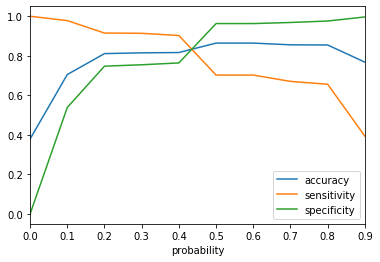

In [90]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.44 is the optimum point to take it as a cutoff probability.

In [91]:
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
0,1,0.318566,2930,1,1,1,1,0,0,0,0,0,0,0
1,0,0.440161,378,1,1,1,1,1,0,0,0,0,0,1
2,1,0.998891,2655,1,1,1,1,1,1,1,1,1,1,1
3,0,0.011363,3752,1,0,0,0,0,0,0,0,0,0,0
4,0,0.440161,6388,1,1,1,1,1,0,0,0,0,0,1


In [93]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8163995908625981

#### Metrics beyond simle accuracy

In [95]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2782,  860],
       [ 217, 2007]], dtype=int64)

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9024280575539568

In [98]:
# Let us calculate specificity
TN / float(TN+FP)

0.7638660076880834

In [99]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.23613399231191654


In [100]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7000348796651552


In [101]:
# Negative predictive value
print (TN / float(TN+FN))

0.9276425475158386


## Precision and Recall

In [102]:
#Looking at the confusion matrix

In [103]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2782,  860],
       [ 217, 2007]], dtype=int64)

##### Precision
TP / TP + FP

In [104]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7000348796651552

##### Recall
TP / TP + FN

In [105]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9024280575539568

Using sklearn utilities for the same

In [106]:
from sklearn.metrics import precision_score, recall_score

In [107]:
#?precision_score

In [109]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7000348796651552

In [110]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9024280575539568

### Precision and recall tradeoff

In [111]:
from sklearn.metrics import precision_recall_curve

In [112]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       0
 4       0
 5       1
 6       0
 7       1
 8       1
 9       0
 10      1
 11      1
 12      1
 13      1
 14      0
 15      1
 16      0
 17      0
 18      0
 19      1
 20      0
 21      0
 22      0
 23      0
 24      1
 25      1
 26      0
 27      0
 28      1
 29      0
        ..
 5836    1
 5837    0
 5838    0
 5839    1
 5840    0
 5841    1
 5842    1
 5843    1
 5844    0
 5845    0
 5846    0
 5847    0
 5848    1
 5849    1
 5850    1
 5851    0
 5852    1
 5853    1
 5854    0
 5855    0
 5856    0
 5857    1
 5858    0
 5859    0
 5860    0
 5861    0
 5862    1
 5863    1
 5864    0
 5865    0
 Name: Converted, Length: 5866, dtype: int64, 0       0
 1       1
 2       1
 3       0
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      1
 11      1
 12      1
 13      1
 14      0
 15      1
 16      1
 17      0
 18      0
 19      1
 20      0
 21      0
 22      0
 23      1
 24      1
 25      

In [113]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

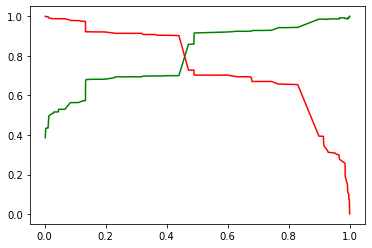

In [114]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Precision-Recall curve cut-off is 0.48 which is very near to the ROC cut-off 0.44

## Assigning a 'Lead Score' for each lead from Train dataset

In [115]:
y_train_pred_final['Lead Score'] = round(y_train_pred_final.Convert_Prob * 100)
y_train_pred_final[['Lead Number', 'Converted', 'Convert_Prob', 'Predicted', 'Lead Score']].head()

,Lead Number,Converted,Convert_Prob,Predicted,Lead Score
0,2930,1,0.318566,0,32.0
1,378,0,0.440161,1,44.0
2,2655,1,0.998891,1,100.0
3,3752,0,0.011363,0,1.0
4,6388,0,0.440161,1,44.0


## Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

In [120]:
#Logistic Regression - Feature Selection with SelectFromModel
from sklearn.feature_selection import SelectFromModel
smf=SelectFromModel(logreg, threshold=-np.inf, max_features=3)
smf.fit(X_train, y_train)
feature_idx = smf.get_support()
feature_name = X_train.columns[feature_idx]
feature_name

Index(['Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email'],
      dtype='object')

## What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

In [121]:
#Logistic Regression - Feature Selection with SelectFromModel
smf=SelectFromModel(logreg, threshold=-np.inf, max_features=3)
smf.fit(X_train[col], y_train)
feature_idx = smf.get_support()
feature_name = X_train[col].columns[feature_idx]
feature_name

Index(['Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email'],
      dtype='object')

### Step-11: Making predictions on the test set

In [122]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Last Activity_SMS Sent,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Tags_in touch with EINS,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
8158,0,0,0,1,0,0,0,1,0,1,0
1727,0,0,0,1,0,0,0,1,0,1,0
8614,1,0,0,1,0,0,0,0,0,1,0
7713,0,0,1,1,0,0,0,0,0,0,0
8856,0,0,0,1,0,0,0,0,0,0,0


In [123]:
X_test_sm = sm.add_constant(X_test)

In [124]:
y_test_pred = res.predict(X_test_sm)

In [125]:
y_test_pred[:10]

8158    0.133923
1727    0.133923
8614    0.000696
7713    0.066499
8856    0.011363
3694    0.318566
7602    0.440161
9203    0.440161
224     0.440161
2174    0.013817
dtype: float64

In [126]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [127]:
# Let's see the head
y_pred_1.head()

,0
8158,0.133923
1727,0.133923
8614,0.000696
7713,0.066499
8856,0.011363


In [128]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [129]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [130]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [131]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [132]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,8158,0.133923
1,0,1727,0.133923
2,0,8614,0.000696
3,0,7713,0.066499
4,0,8856,0.011363


In [133]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [134]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Convert_Prob'], axis=1)

In [135]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Convert_Prob
0,8158,1,0.133923
1,1727,0,0.133923
2,8614,0,0.000696
3,7713,0,0.066499
4,8856,0,0.011363


## Assiging a "Lead Score" for each lead from Test dataset

In [137]:
y_pred_final['Lead Score'] = round(y_pred_final.Convert_Prob * 100)
y_pred_final[['Lead Number', 'Converted', 'Convert_Prob', 'Lead Score']].head()

,Lead Number,Converted,Convert_Prob,Lead Score
0,8158,1,0.133923,13.0
1,1727,0,0.133923,13.0
2,8614,0,0.000696,0.0
3,7713,0,0.066499,7.0
4,8856,0,0.011363,1.0
